In [1]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules



"""

'\nPurpose: To Run the proofreading of neurons in the \ntest set and measure the precision and recall of the new rules\n\n\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-24 17:00:22,625 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:00:22,626 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:00:22,627 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:00:22,632 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-24 17:00:22,632 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:00:22,642 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-24 17:00:23,112 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:00:23,117 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:00:23,118 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:00:23,118 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:00:23,119 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:00:23,120 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:00:23,120 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:00:23,121 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:00:23,664 - settings - Setting enable_python_native_blobs to True


In [4]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-24 17:00:23,805 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:00:23,816 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:00:23,817 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:00:23,819 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:00:24,414 - settings - Setting enable_python_native_blobs to True


In [5]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Runnig the validation

In [6]:
"""
Psueodocode: 
1) Pull down the segment ids of the valid neurons

For each neuron
1) Dwonload the neuron object
2) Run the Proofreading
3) Print out the validation plot
4) Save the validation df

"""

'\nPsueodocode: \n1) Pull down the segment ids of the valid neurons\n\nFor each neuron\n1) Dwonload the neuron object\n2) Run the Proofreading\n3) Print out the validation plot\n4) Save the validation df\n\n'

In [7]:
segment_ids = minnie.AutoProofreadValidationBorderNeurons().fetch("segment_id")

In [8]:
job_idx = 8
job_step = 5
segments_to_process = segment_ids[job_idx*job_step:(job_idx+1)*job_step]
segments_to_process

array([864691136333790899, 864691136008573614, 864691135974454639,
       864691135393964789, 864691135233108569])


--- Working on Neuron 864691136333790899 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate [1151351.23020135 1069520.47210081 1034775.44960969]--------
coordinate [1151351.23020135 1069520.47210081 1034775.44960969] had error branches []--------


 ----- Working on coordinate [1188162.68574686  919244.52722988  960292.86774105]--------
coordinate [1188162.68574686  919244.52722988  960292.86774105] had error branches [1, 2, 3, 4, 5, 6, 7]--------


 ----- Working on coordinate [1192393.97673916  941640.83090043  960640.62590596]--------
coordinate [1192393.97673916  941640.83090043  960640.62590596] had error branches [1, 2, 3, 4, 5, 6, 7, 35, 37]--------


 ----- Working on coordinate [1193522.66603431  945683.82168797  960626.75233857]--------
coordinate [1193522.66603431  945683.82168797  960626.75233857] had error branches [1, 2, 3, 4, 5, 6, 7, 35, 37, 15, 41, 43, 14]--------


 ----- Working on coordinate [1194603.07937967  940936.5921435

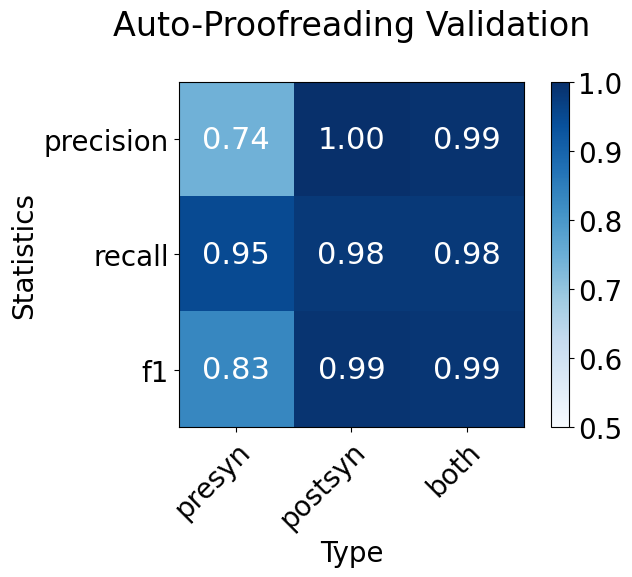

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691136333790899_validation_df.pbz2
File size is 0.082539 MB
Total time for neuron 864691136333790899: 347.56049942970276

--- Working on Neuron 864691136008573614 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate [1073365.78687873  613176.76059241  763376.48748465]--------
coordinate [1073365.78687873  613176.76059241  763376.48748465] had error branches []--------


 ----- Working on coordinate [1254992.13007429  771112.94123505  657259.86784752]--------
coordinate [1254992.13007429  771112.94123505  657259.86784752] had error branches [5, 6]--------


 ----- Working on coordinate [1275646.69029475  861716.55451904  706547.96297598]--------
coordinate [1275646.69029475  861716.55451904  706547.96297598] had error branches [5, 6, 49, 45]--------


 ----- Working on coordinate [1282778.49501984  738362.50494259  679916.65631359]--------
coordinate [1282

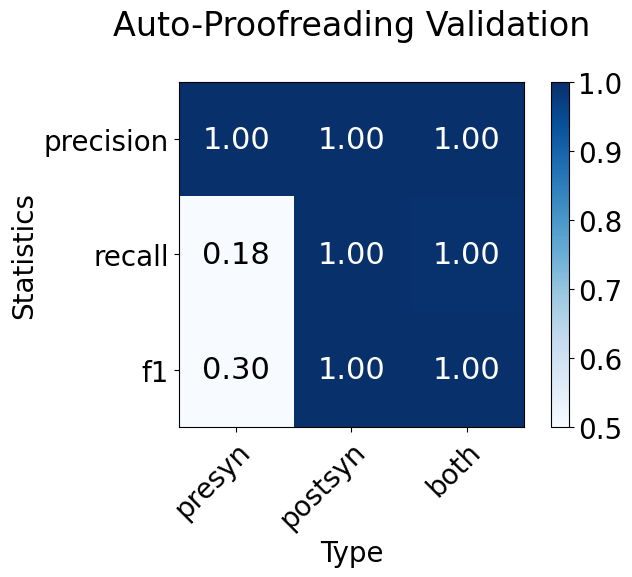

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691136008573614_validation_df.pbz2
File size is 0.193423 MB
Total time for neuron 864691136008573614: 324.6377818584442

--- Working on Neuron 864691135974454639 --
Decompressing Neuron in minimal output mode...please wait
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
Apply the presyn non_error
For presyn: # valid synapses = 2, # error synapses  = 121, # error presyns = 13
For postsyn: # valid synapses = 1748, # error synapses  = 25, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 1896
n_valid_syn_ids_presyn = 2
n_errored_syn_ids_presyn = 121
n_valid_syn_ids_postsyn = 1748
n_errored_syn_ids_postsyn = 25
Segment Id = 864691135974454639
Postsyn counts:
TP:1741
TN:2
FP:7
FN:23
Presyn counts:
TP:2
TN:108
FP:0
FN:0


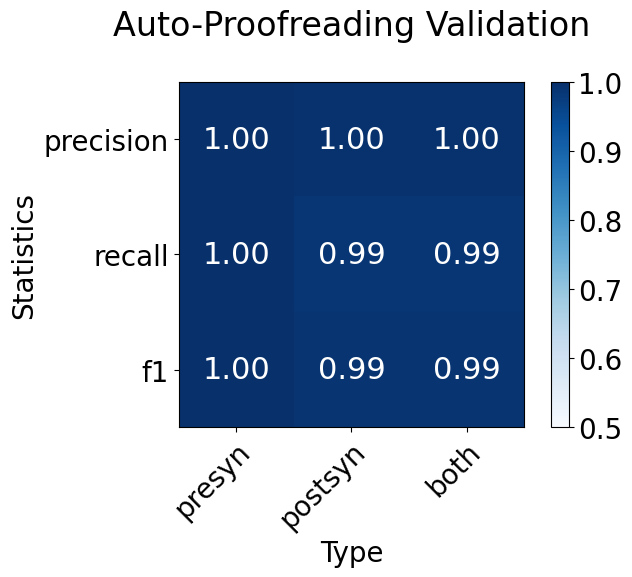

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691135974454639_validation_df.pbz2
File size is 0.039157 MB
Total time for neuron 864691135974454639: 47.99247169494629

--- Working on Neuron 864691135393964789 --
Decompressing Neuron in minimal output mode...please wait
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
Skipping the double back even though double back threshold violated because the angle with the top is 35.69 which is less than set threshold 39 
Skipping the double back even though double back threshold violated because the angle with the top is 35.69 which is less than set threshold 39 
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
Apply the presyn non_error
For presyn: # valid synapses = 3, # error synapses  = 212, # error presyns = 21
For postsyn: # valid synapses = 1528, # error synapses  = 171, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 1914
n_valid_syn_ids_presyn = 

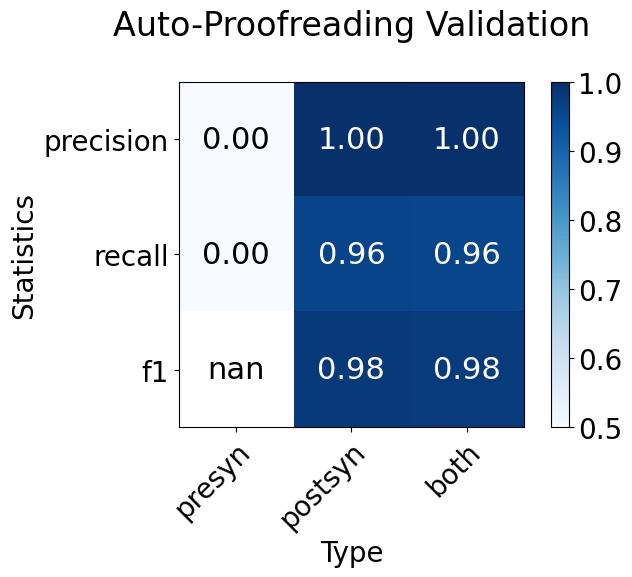

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691135393964789_validation_df.pbz2
File size is 0.03868 MB
Total time for neuron 864691135393964789: 118.38810753822327

--- Working on Neuron 864691135233108569 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate [657640.60575397 724592.75407308 872310.31142854]--------
coordinate [657640.60575397 724592.75407308 872310.31142854] had error branches []--------


 ----- Working on coordinate [658053.4 733005.  874762.9]--------
coordinate [658053.4 733005.  874762.9] had error branches [12, 13]--------


 ----- Working on coordinate [661860.6 765431.9 837895.8]--------
coordinate [661860.6 765431.9 837895.8] had error branches [12, 13, 15, 5]--------


 ----- Working on coordinate [681132.1945254  725487.35700637 863074.9188705 ]--------
coordinate [681132.1945254  725487.35700637 863074.9188705 ] had error branches [12, 13, 15, 5, 21, 1]--------


 -----

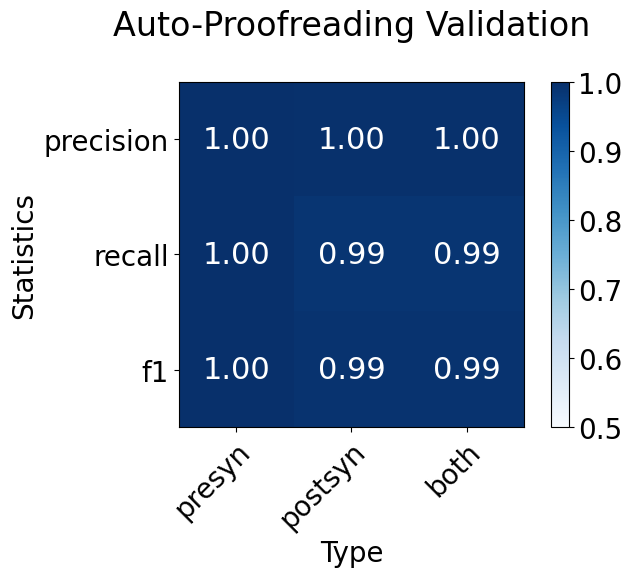

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691135233108569_validation_df.pbz2
File size is 0.017369 MB
Total time for neuron 864691135233108569: 36.47827959060669


In [9]:
for seg_id in segments_to_process:
    print(f"\n--- Working on Neuron {seg_id} --")
    st = time.time()
    
    
    #1) Dwonload the neuron object
    neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                       border_validation=True)
    
    (filt_neuron,
     return_synapse_df_revised,
    return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = pru.v4_exc_filters(),
                        plot_limb_branch_filter_with_disconnect_effect = False,
                        verbose = False,
                        plot_score=False)
    
    vu.synapse_validation_df_to_score_plot(return_validation_df_revised)
    
    su.compressed_pickle(return_validation_df_revised,f"./validation_data/{seg_id}_validation_df")
    
    print(f"Total time for neuron {seg_id}: {time.time() - st}")